In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read a stock data to a dataframe

bbl = pd.read_csv('Data/SET50_download_r2/bbl.bk.csv', index_col = 0)
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,62.0,63.5,62.0,63.5,34.893204,2888500
2000-01-05,60.0,61.0,59.0,59.5,32.695194,1936700
2000-01-06,59.5,60.0,56.0,56.5,31.046707,1621900
2000-01-07,58.5,59.0,56.5,59.0,32.420460,854600
2000-01-10,61.0,61.5,60.0,60.5,33.244705,1190700
...,...,...,...,...,...,...
2024-02-19,140.0,141.0,140.0,140.5,140.500000,2695300
2024-02-20,141.0,142.5,141.0,142.0,142.000000,7460200
2024-02-21,144.0,144.5,143.5,143.5,143.500000,10317300


In [3]:
bbl = pd.read_csv('Data/SET50_download_r2/bbl.bk.csv', index_col = 0)
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,62.0,63.5,62.0,63.5,34.893204,2888500
2000-01-05,60.0,61.0,59.0,59.5,32.695194,1936700
2000-01-06,59.5,60.0,56.0,56.5,31.046707,1621900
2000-01-07,58.5,59.0,56.5,59.0,32.420460,854600
2000-01-10,61.0,61.5,60.0,60.5,33.244705,1190700
...,...,...,...,...,...,...
2024-02-19,140.0,141.0,140.0,140.5,140.500000,2695300
2024-02-20,141.0,142.5,141.0,142.0,142.000000,7460200
2024-02-21,144.0,144.5,143.5,143.5,143.500000,10317300


In [4]:
bbl.shape

(5994, 6)

In [5]:
bbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 2000-01-04 to 2024-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5994 non-null   float64
 1   High       5994 non-null   float64
 2   Low        5994 non-null   float64
 3   Close      5994 non-null   float64
 4   Adj Close  5994 non-null   float64
 5   Volume     5994 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 327.8+ KB


In [6]:
df = bbl.loc['2023-01': '2023-12']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,149.0,152.0,148.0,151.0,146.367798,15483900
2023-01-04,152.0,153.5,151.5,153.5,148.791107,13499800
2023-01-05,155.0,155.5,152.5,152.5,147.821777,14111200
2023-01-06,153.5,157.5,153.0,157.0,152.183746,11881800
2023-01-09,158.5,159.0,157.0,157.5,152.668396,10912200
...,...,...,...,...,...,...
2023-11-24,151.5,151.5,151.0,151.5,151.500000,1952200
2023-11-27,151.0,151.5,150.0,150.5,150.500000,6005200
2023-11-28,151.0,152.5,150.5,152.0,152.000000,4786200


In [7]:
# simple moving average

def ema(close, window):

    return close.ewm(span = window, adjust = False).mean()

In [8]:
ma_period = 10

df[f'ema_{ma_period}'] = ema(df['Close'], window = ma_period)
df

/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_45010/3153656915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ema_{ma_period}'] = ema(df['Close'], window = ma_period)


,Open,High,Low,Close,Adj Close,Volume,ema_10
Date,,,,,,,
2023-01-03,149.0,152.0,148.0,151.0,146.367798,15483900,151.000000
2023-01-04,152.0,153.5,151.5,153.5,148.791107,13499800,151.454545
2023-01-05,155.0,155.5,152.5,152.5,147.821777,14111200,151.644628
2023-01-06,153.5,157.5,153.0,157.0,152.183746,11881800,152.618332
2023-01-09,158.5,159.0,157.0,157.5,152.668396,10912200,153.505908
...,...,...,...,...,...,...,...
2023-11-24,151.5,151.5,151.0,151.5,151.500000,1952200,152.624749
2023-11-27,151.0,151.5,150.0,150.5,150.500000,6005200,152.238431
2023-11-28,151.0,152.5,150.5,152.0,152.000000,4786200,152.195080


In [9]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,ema_10
Date,,,,,,,
2023-01-03,149.0,152.0,148.0,151.0,146.367798,15483900,151.000000
2023-01-04,152.0,153.5,151.5,153.5,148.791107,13499800,151.454545
2023-01-05,155.0,155.5,152.5,152.5,147.821777,14111200,151.644628
2023-01-06,153.5,157.5,153.0,157.0,152.183746,11881800,152.618332
2023-01-09,158.5,159.0,157.0,157.5,152.668396,10912200,153.505908
2023-01-10,158.0,159.0,156.5,159.0,154.122391,9815200,154.504834
2023-01-11,158.5,158.5,156.5,157.0,152.183746,12835000,154.958500
2023-01-12,157.0,158.0,155.5,155.5,150.729752,11441600,155.056955
2023-01-13,156.0,157.0,154.0,156.5,151.699081,17012600,155.319327


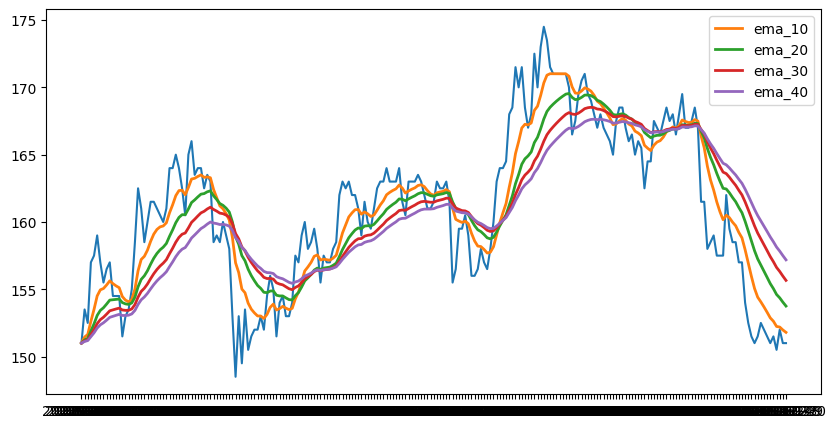

In [11]:
n = np.linspace(10, 40, 4)
plt.figure(figsize = (10, 5))

plt.plot(df["Close"])
for i in range(0,len(n)):

    plt.plot(ema(df["Close"], window = int(n[i])), label = f"ema_{int(n[i])}", linewidth = 2)

plt.legend();